Predicting ER Wait Times with Random Forest Regression and Gradient Boosting

In [134]:
#data manipulation 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.model_selection import train_test_split

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

1. Dataset information & Data processing

In [135]:
#load dataset
ER = pd.read_csv('ER Wait Time Dataset.csv')

ER.shape #the output represents (# of data points, # of columns)

(5000, 19)

In [136]:
#shows the first three data entries
ER.head(3)

,Visit_ID,Patient_ID,Hospital_ID,Hospital_Name,Region,Visit_Date,Day_of_Week,Season,Time_of_Day,Urgency_Level,Nurse-to-Patient_Ratio,Specialist_Availability,Facility_Size_(Beds),Time_to_Registration_(min),Time_to_Triage_(min),Time_to_Medical_Professional_(min),Total_Wait_Time_(min),Patient_Outcome,Patient_Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1


In [137]:
ER.dtypes #shows the data types
          #data is a mix of numerical and categorical

Visit_ID                              object
Patient_ID                            object
Hospital_ID                           object
Hospital_Name                         object
Region                                object
Visit_Date                            object
Day_of_Week                           object
Season                                object
Time_of_Day                           object
Urgency_Level                         object
Nurse-to-Patient_Ratio                 int64
Specialist_Availability                int64
Facility_Size_(Beds)                   int64
Time_to_Registration_(min)             int64
Time_to_Triage_(min)                   int64
Time_to_Medical_Professional_(min)     int64
Total_Wait_Time_(min)                  int64
Patient_Outcome                       object
Patient_Satisfaction                   int64
dtype: object

In [138]:
#change the categorical data types to lowercase to clean data and ensure consistency

ER.Visit_ID = ER.Visit_ID.str.lower()
ER.Patient_ID = ER.Patient_ID.str.lower()
ER.Hospital_ID = ER.Hospital_ID.str.lower()
ER.Hospital_Name = ER.Hospital_Name.str.lower()
ER.Region = ER.Region.str.lower()
ER.Visit_Date = ER.Visit_Date.str.lower()
ER.Day_of_Week = ER.Day_of_Week.str.lower()
ER.Season = ER.Season.str.lower()
ER.Time_of_Day = ER.Time_of_Day.str.lower()
ER.Urgency_Level = ER.Urgency_Level.str.lower()
ER.Patient_Outcome = ER.Patient_Outcome.str.lower()


In [139]:
#output that shows all the categorical value outputs are now lower case
ER.head(3)

,Visit_ID,Patient_ID,Hospital_ID,Hospital_Name,Region,Visit_Date,Day_of_Week,Season,Time_of_Day,Urgency_Level,Nurse-to-Patient_Ratio,Specialist_Availability,Facility_Size_(Beds),Time_to_Registration_(min),Time_to_Triage_(min),Time_to_Medical_Professional_(min),Total_Wait_Time_(min),Patient_Outcome,Patient_Satisfaction
0,hosp-1-20240210-0001,pat-00001,hosp-1,springfield general hospital,urban,2024-02-10 20:20:56,saturday,winter,late morning,medium,4,3,92,17,22,66,105,discharged,1
1,hosp-3-20241128-0001,pat-00002,hosp-3,northside community hospital,rural,2024-11-28 02:07:47,thursday,fall,evening,medium,4,0,38,9,30,30,69,discharged,3
2,hosp-3-20240930-0002,pat-00003,hosp-3,northside community hospital,rural,2024-09-30 04:02:28,monday,fall,evening,low,5,1,38,38,40,125,203,discharged,1


In [140]:
#Encode the categorical data as numerical values 
le = LabelEncoder()

#apply method fit_transform
ER.Visit_ID = le.fit_transform(ER.Visit_ID)
ER.Patient_ID = le.fit_transform(ER.Patient_ID)
ER.Hospital_ID = le.fit_transform(ER.Hospital_ID)
ER.Hospital_Name = le.fit_transform(ER.Hospital_Name)
ER.Region = le.fit_transform(ER.Region)
ER.Visit_Date = le.fit_transform(ER.Visit_Date)
ER.Day_of_Week = le.fit_transform(ER.Day_of_Week)
ER.Season = le.fit_transform(ER.Season)
ER.Time_of_Day = le.fit_transform(ER.Time_of_Day)
ER.Urgency_Level = le.fit_transform(ER.Urgency_Level)
ER.Patient_Outcome = le.fit_transform(ER.Patient_Outcome)


In [141]:
#print again to show that all features are now in numerical format
ER.head(3)

,Visit_ID,Patient_ID,Hospital_ID,Hospital_Name,Region,Visit_Date,Day_of_Week,Season,Time_of_Day,Urgency_Level,Nurse-to-Patient_Ratio,Specialist_Availability,Facility_Size_(Beds),Time_to_Registration_(min),Time_to_Triage_(min),Time_to_Medical_Professional_(min),Total_Wait_Time_(min),Patient_Outcome,Patient_Satisfaction
0,115,0,0,2,1,583,2,3,3,3,4,3,92,17,22,66,105,1,1
1,2931,1,2,0,0,4567,4,0,2,3,4,0,38,9,30,30,69,1,3
2,2766,2,2,0,0,3764,1,0,2,2,5,1,38,38,40,125,203,1,1


In [142]:
#change the datatypes of the changed variables to "category"
ER.Visit_ID = ER.Visit_ID.astype("category")
ER.Patient_ID = ER.Patient_ID.astype("category")
ER.Hospital_ID = ER.Hospital_ID.astype("category")
ER.Hospital_Name = ER.Hospital_Name.astype("category")
ER.Region = ER.Region.astype("category")
ER.Visit_Date = ER.Visit_Date.astype("category")
ER.Day_of_Week = ER.Day_of_Week.astype("category")
ER.Season = ER.Season.astype("category")
ER.Time_of_Day = ER.Time_of_Day.astype("category")
ER.Urgency_Level = ER.Urgency_Level.astype("category")
ER.Patient_Outcome = ER.Patient_Outcome.astype("category")


In [143]:
ER.dtypes

Visit_ID                              category
Patient_ID                            category
Hospital_ID                           category
Hospital_Name                         category
Region                                category
Visit_Date                            category
Day_of_Week                           category
Season                                category
Time_of_Day                           category
Urgency_Level                         category
Nurse-to-Patient_Ratio                   int64
Specialist_Availability                  int64
Facility_Size_(Beds)                     int64
Time_to_Registration_(min)               int64
Time_to_Triage_(min)                     int64
Time_to_Medical_Professional_(min)       int64
Total_Wait_Time_(min)                    int64
Patient_Outcome                       category
Patient_Satisfaction                     int64
dtype: object

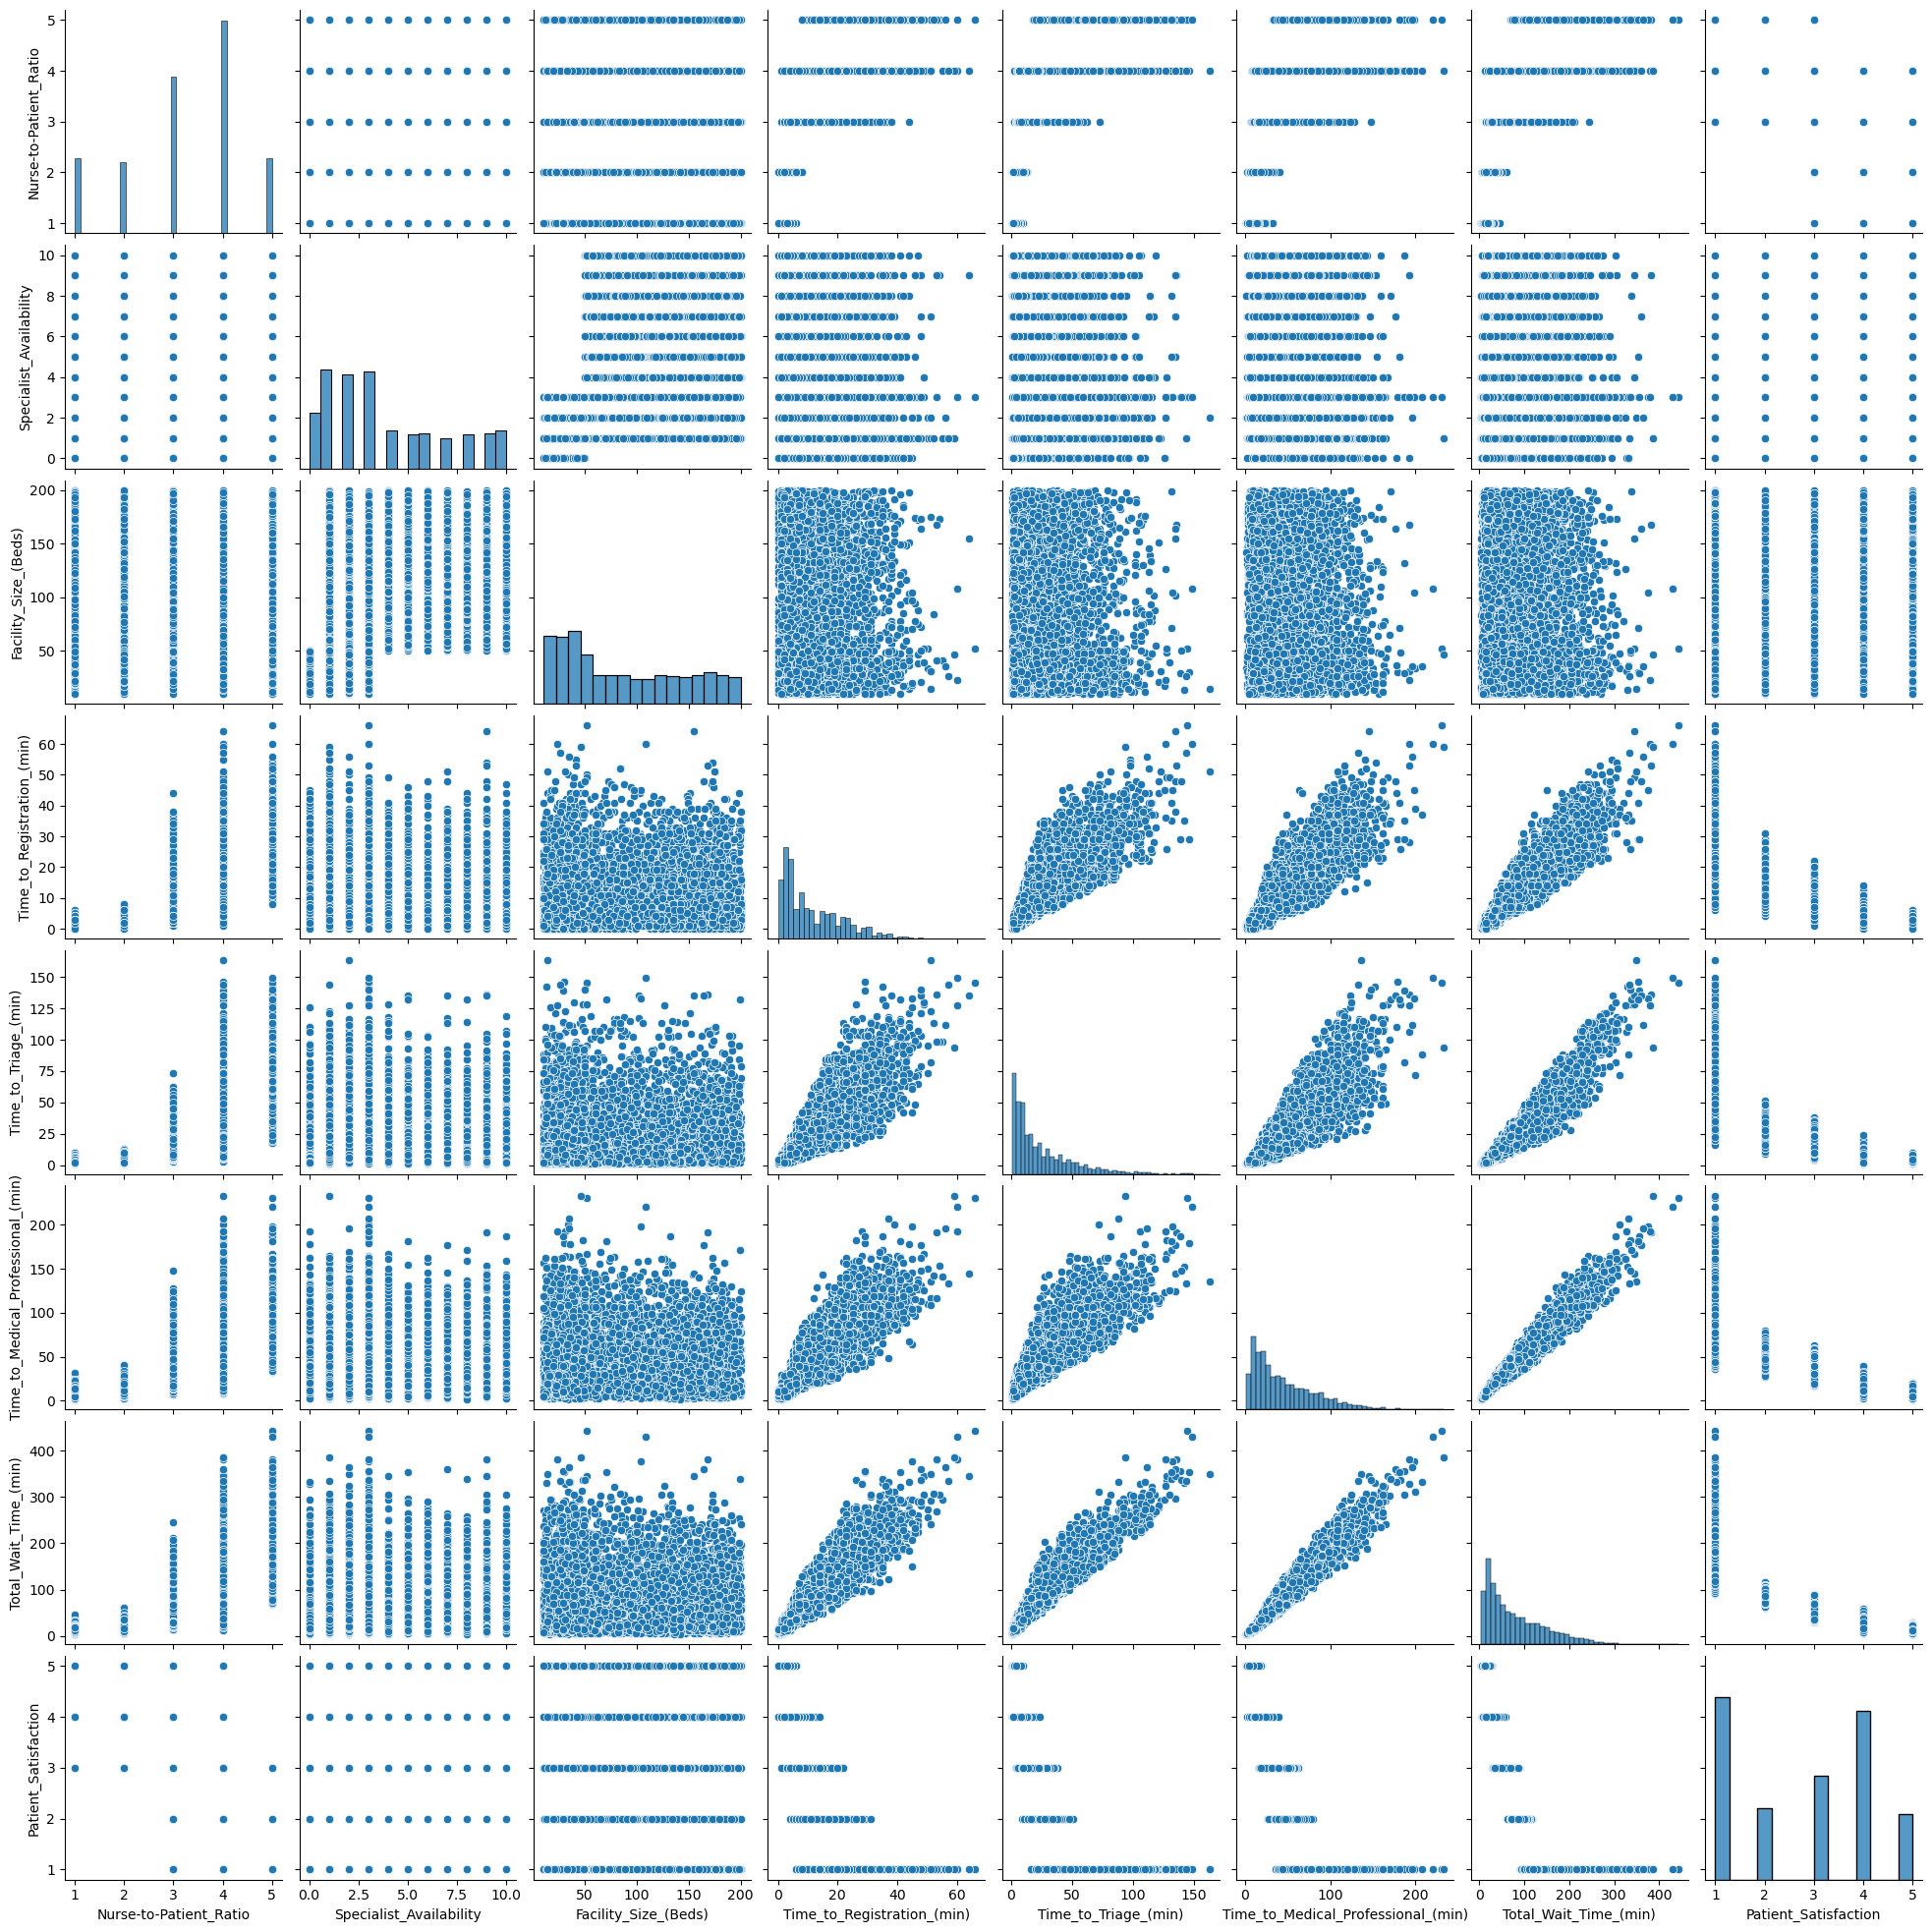

In [144]:
#visualize data to see if any outliers
sns.pairplot(ER)

<Axes: >

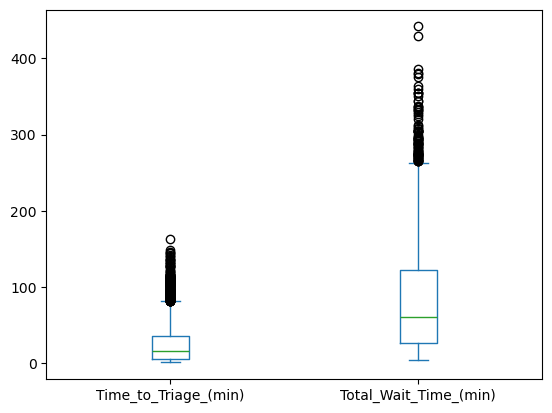

In [ ]:
#create a box plot to visualize data and identify outliers 
ER[["Time_to_Triage_(min)", "Total_Wait_Time_(min)"]].plot(kind = "box")

2. Generate train/test sets